In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d vishalmane10/anime-dataset-2022



 84% 4.00M/4.74M [00:01<00:00, 4.58MB/s]

100% 4.74M/4.74M [00:01<00:00, 3.82MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/anime-dataset-2022.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import os

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('/kaggle/input/anime-dataset-2022/Anime.csv')

In [3]:
df.head()

,Rank,Name,Japanese_name,Type,Episodes,Studio,Release_season,Tags,Rating,Release_year,End_year,Description,Content_Warning,Related_Mange,Related_anime,Voice_actors,staff
0,1,Demon Slayer: Kimetsu no Yaiba - Entertainment...,Kimetsu no Yaiba: Yuukaku-hen,TV,NaN,ufotable,Fall,"Action, Adventure, Fantasy, Shounen, Demons, H...",4.60,2021.0,NaN,'Tanjiro and his friends accompany the Hashira...,Explicit Violence,Demon Slayer: Kimetsu no Yaiba,"Demon Slayer: Kimetsu no Yaiba, Demon Slayer: ...","Inosuke Hashibira : Yoshitsugu Matsuoka, Nezuk...","Koyoharu Gotouge : Original Creator, Haruo Sot..."
1,2,Fruits Basket the Final Season,Fruits Basket the Final,TV,13.0,TMS Entertainment,Spring,"Drama, Fantasy, Romance, Shoujo, Animal Transf...",4.60,2021.0,NaN,'The final arc of Fruits Basket.',"Emotional Abuse,, Mature Themes,, Physical Abu...","Fruits Basket, Fruits Basket Another","Fruits Basket 1st Season, Fruits Basket 2nd Se...","Akito Sohma : Maaya Sakamoto, Kyo Sohma : Yuum...","Natsuki Takaya : Original Creator, Yoshihide I..."
2,3,Mo Dao Zu Shi 3,The Founder of Diabolism 3,Web,12.0,B.C MAY PICTURES,NaN,"Fantasy, Ancient China, Chinese Animation, Cul...",4.58,2021.0,NaN,'The third season of Mo Dao Zu Shi.',NaN,Grandmaster of Demonic Cultivation: Mo Dao Zu ...,"Mo Dao Zu Shi 2, Mo Dao Zu Shi Q","Lan Wangji, Wei Wuxian, Jiang Cheng, Jin Guang...","Mo Xiang Tong Xiu : Original Creator, Xiong Ke..."
3,4,Fullmetal Alchemist: Brotherhood,Hagane no Renkinjutsushi: Full Metal Alchemist,TV,64.0,Bones,Spring,"Action, Adventure, Drama, Fantasy, Mystery, Sh...",4.58,2009.0,2010.0,"""The foundation of alchemy is based on the law...","Animal Abuse,, Mature Themes,, Violence,, Dome...","Fullmetal Alchemist, Fullmetal Alchemist (Ligh...","Fullmetal Alchemist: Brotherhood Specials, Ful...","Alphonse Elric : Rie Kugimiya, Edward Elric : ...","Hiromu Arakawa : Original Creator, Yasuhiro Ir..."
4,5,Attack on Titan 3rd Season: Part II,Shingeki no Kyojin Season 3: Part II,TV,10.0,WIT Studio,Spring,"Action, Fantasy, Horror, Shounen, Dark Fantasy...",4.57,2019.0,NaN,'The battle to retake Wall Maria begins now! W...,"Cannibalism,, Explicit Violence","Attack on Titan, Attack on Titan: End of the W...","Attack on Titan, Attack on Titan 2nd Season, A...","Armin Arlelt : Marina Inoue, Eren Jaeger : Yuu...","Hajime Isayama : Original Creator, Tetsurou Ar..."


<Axes: xlabel='Type'>

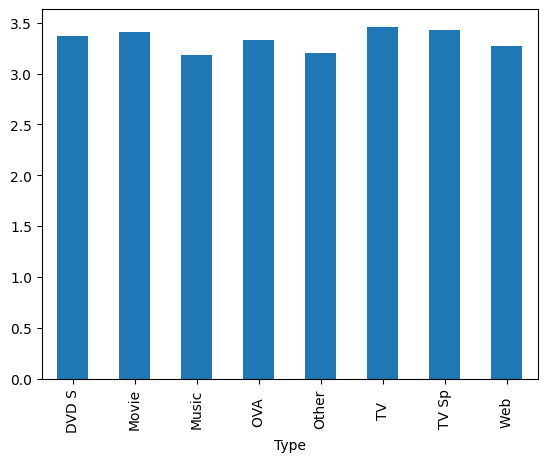

In [4]:
# @title Average rating by show type

df.groupby('Type')['Rating'].mean().plot(kind='bar')

In [5]:
missing_values = df.isna().sum()

In [6]:
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
Japanese_name      10557
Episodes            8994
Studio              6477
Release_season     14379
Tags                 400
Rating              3131
Release_year         383
End_year           15641
Description            4
Content_Warning    16655
Related_Mange      10868
Related_anime       8432
Voice_actors        3186
staff               5490
dtype: int64


In [7]:
df['Description'] = df['Description'].fillna('')

In [8]:
df.Description.head()

0    'Tanjiro and his friends accompany the Hashira...
1                    'The final arc of Fruits Basket.'
2                 'The third season of Mo Dao Zu Shi.'
3    "The foundation of alchemy is based on the law...
4    'The battle to retake Wall Maria begins now! W...
Name: Description, dtype: object

In [9]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df['Description'] = df['Description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['Description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(18495, 34609)

In [10]:
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [11]:
indices = pd.Series(df.index, index=df['Name']).drop_duplicates()

In [12]:
def get_recommendations(name, cosine_sim=cosine_sim):
    # Get the index of the anime that matches the title
    idx = indices[name]

    # Get the pairwsie similarity scores of all animes with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the animes based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar animes
    sim_scores = sim_scores[1:11]

    # Get the anime indices
    anime_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar animes
    return df['Name'].iloc[anime_indices]

In [13]:
get_recommendations('Attack on Titan 3rd Season: Part II')

77                      Attack on Titan 2nd Season
42                      Attack on Titan 3rd Season
12772                                   Back Arrow
3895                  Attack on Titan: Junior High
6        Attack on Titan The Final Season: Part II
7977                                 Boundary line
4912                            Record of Ragnarok
4106               Robotech: The Shadow Chronicles
4477                        Happy Lucky Bikkuriman
748                    Attack on Titan: Lost Girls
Name: Name, dtype: object

In [14]:
get_recommendations('Fruits Basket the Final Season')

26                                Fruits Basket 2nd Season
41                     Gintama.: Shirogane no Tamashii-hen
2421             Ling Long: Incarnation Zhong Zhang (2021)
12088               Pokemon: Pikachu's Summer Bridge Story
204            Gintama: Yorinuki Gintama-san on Theater 2D
8388                              Terra Formars: Earth Arc
18396    Magia Record: Puella Magi Madoka Magica Side S...
1235     Danganronpa 3: The End of Hope's Peak Academy-...
10799                                Magia Record Arc 1 OP
219                               Fairy Tail: Final Season
Name: Name, dtype: object

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# Display column names
print(df.columns)


Index(['Rank', 'Name', 'Japanese_name', 'Type', 'Episodes', 'Studio',
       'Release_season', 'Tags', 'Rating', 'Release_year', 'End_year',
       'Description', 'Content_Warning', 'Related_Mange', 'Related_anime',
       'Voice_actors', 'staff'],
      dtype='object')


In [17]:
df = df.dropna(subset=['Rating'])  # Drop rows with NaN values in 'Rating' column
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['Rating'])
df['Rating'] = df['Rating'].astype(int)
df['Rating'] = df['Rating'] - 1

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier




from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame

# Convert categorical columns to numeric using LabelEncoder
label_encoders = {}
for column in df.columns[df.dtypes == 'object']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Extract target column and features
target_column = 'Rating'  # Replace 'Target_Column' with the actual name of your target column
features = df.drop(target_column, axis=1)
target = df[target_column]

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [19]:
print(X_train.shape)
print(X_test.shape)

(12291, 16)
(3073, 16)


In [20]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
# Initialize SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can choose other strategies as well

# Impute missing values in the training data
X_train_imputed = imputer.fit_transform(X_train)

# Impute missing values in the test data
X_test_imputed = imputer.transform(X_test)
pca=PCA()
# Perform PCA on the imputed data
pca.fit(X_train_imputed)
X_train_pca = pca.transform(X_train_imputed)


In [21]:
print(X_train_imputed.shape)
print(X_test_imputed.shape)
print(X_train_pca)

(12291, 16)
(3073, 16)
[[ 4.15167989e+03  3.53984728e+03  2.44618493e+03 ... -2.40834916e+00
  -1.68599155e-01  5.12354897e-01]
 [ 3.31327471e+03 -3.21403757e+03  5.16438186e+03 ... -1.37888732e+00
   2.82242547e+00  3.12518391e-01]
 [ 8.21629158e+03  2.24435720e+03  7.54513322e+02 ...  1.43560188e+00
  -1.18431048e+00 -5.56685534e-01]
 ...
 [ 4.22849056e+03  2.46227967e+02  1.15732883e+03 ...  1.60180548e-01
  -1.67416505e+00 -1.48660075e+00]
 [ 8.73505648e+03 -4.40621076e+03  1.95505770e+03 ... -4.89171366e+00
  -1.83318053e+00 -2.38526516e+00]
 [ 8.00041577e+01 -1.60885245e+03  2.46705455e+03 ... -1.04700035e+01
  -2.93752628e+00  1.86240637e+00]]


In [22]:
# Access the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_


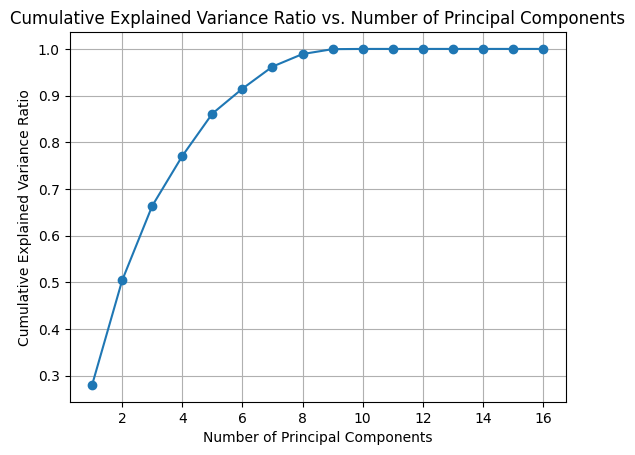

In [23]:
import matplotlib.pyplot as plt

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Principal Components')
plt.grid(True)
plt.show()


In [ ]:
!pip install catboost

In [24]:
unique_labels_train = set(y_train)
unique_labels_test = set(y_test)

print("Unique labels in training set:", unique_labels_train)
print("Unique labels in test set:", unique_labels_test)


Unique labels in training set: {0, 1, 2, 3}
Unique labels in test set: {0, 1, 2, 3, -1}


In [25]:
from catboost import CatBoostClassifier


In [26]:
# add Codeadd Markdown
# Train CatBoost model
catboost_model = CatBoostClassifier(verbose=0)
# catboost_model.fit(X_train, y_train)

# # Evaluate the model
# catboost_accuracy = accuracy_score(y_test, catboost_model.predict(X_test))
# print("CatBoost Accuracy:", catboost_accuracy)

In [27]:
# Filter out samples with label "-1" from the test set
X_test_filtered = X_test[y_test != -1]
y_test_filtered = y_test[y_test != -1]

# Train the model with the filtered test set
catboost_model.fit(X_train, y_train, eval_set=(X_test_filtered, y_test_filtered))


In [25]:
X_test_filtered = X_test[y_test != -1]
y_test_filtered = y_test[y_test != -1]

In [28]:
train_accuracy = catboost_model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)


Training Accuracy: 0.9995931982751607


In [29]:
# Evaluate the model
catboost_accuracy = accuracy_score(y_test, catboost_model.predict(X_test))
print("CatBoost Accuracy:", catboost_accuracy)

CatBoost Accuracy: 0.9973966807679792


In [30]:
catboost_accuracy = accuracy_score(y_test_filtered, catboost_model.predict(X_test_filtered))
print("CatBoost Accuracy:", catboost_accuracy)

CatBoost Accuracy: 0.9977213541666666


cat boost classification report and confusion matrix

Confusion Matrix:
[[   6    0    0    0]
 [   3  454    3    0]
 [   1    0 2425    0]
 [   0    0    0  180]]


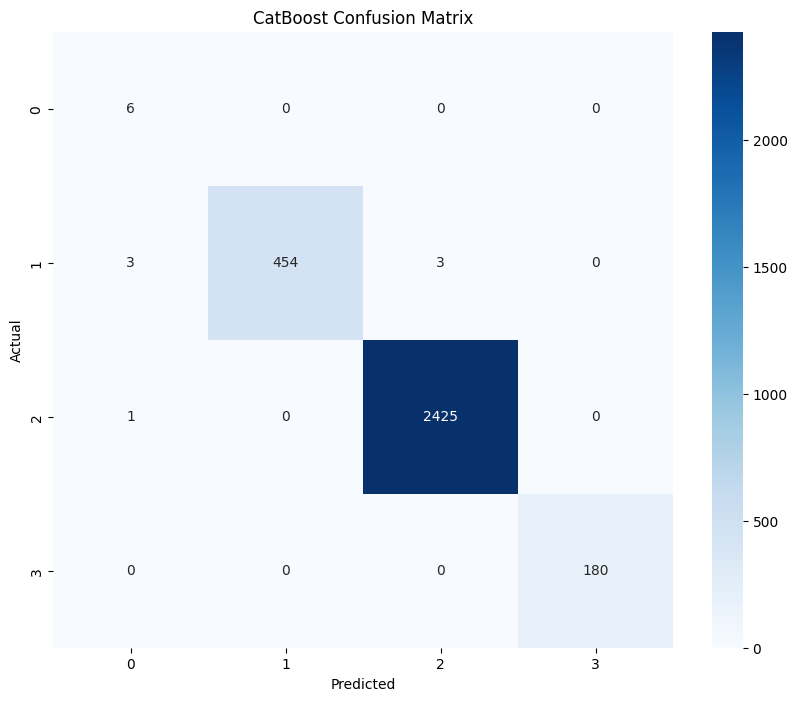

Classification Report:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75         6
           1       1.00      0.99      0.99       460
           2       1.00      1.00      1.00      2426
           3       1.00      1.00      1.00       180

    accuracy                           1.00      3072
   macro avg       0.90      1.00      0.94      3072
weighted avg       1.00      1.00      1.00      3072



In [31]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict the target values for the filtered test set
y_pred_catboost = catboost_model.predict(X_test_filtered)

# Generate confusion matrix
conf_matrix_catboost = confusion_matrix(y_test_filtered, y_pred_catboost)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix_catboost)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_catboost, annot=True, cmap='Blues', fmt='g')
plt.title('CatBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test_filtered, y_pred_catboost))


In [32]:
# Train XGBoost model
X_test_filtered = X_test[y_test != -1]
y_test_filtered = y_test[y_test != -1]
xgb_model = XGBClassifier()
# xgb_model.fit(X_train, y_train)
# Train the XGBoost model using only the training data
xgb_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test_filtered, y_test_filtered)])

# After training, you can evaluate the model's performance using the filtered test set

# Evaluate the model
xgb_accuracy = accuracy_score(y_test_filtered, xgb_model.predict(X_test_filtered))
print("XGBoost Accuracy:", xgb_accuracy)


[0]	validation_0-mlogloss:0.85513	validation_1-mlogloss:0.85687
[1]	validation_0-mlogloss:0.58266	validation_1-mlogloss:0.58568
[2]	validation_0-mlogloss:0.41081	validation_1-mlogloss:0.41482
[3]	validation_0-mlogloss:0.29484	validation_1-mlogloss:0.29972
[4]	validation_0-mlogloss:0.21393	validation_1-mlogloss:0.21969
[5]	validation_0-mlogloss:0.15633	validation_1-mlogloss:0.16295
[6]	validation_0-mlogloss:0.11484	validation_1-mlogloss:0.12214
[7]	validation_0-mlogloss:0.08464	validation_1-mlogloss:0.09269
[8]	validation_0-mlogloss:0.06258	validation_1-mlogloss:0.07133
[9]	validation_0-mlogloss:0.04641	validation_1-mlogloss:0.05568
[10]	validation_0-mlogloss:0.03447	validation_1-mlogloss:0.04442
[11]	validation_0-mlogloss:0.02568	validation_1-mlogloss:0.03610
[12]	validation_0-mlogloss:0.01918	validation_1-mlogloss:0.03020
[13]	validation_0-mlogloss:0.01437	validation_1-mlogloss:0.02596
[14]	validation_0-mlogloss:0.01081	validation_1-mlogloss:0.02277
[15]	validation_0-mlogloss:0.00817	

In [41]:
print("XGBoost Accuracy:", xgb_accuracy)


XGBoost Accuracy: 0.9964192708333334


classification report of xg boost

Confusion Matrix:
[[   5    1    0    0]
 [   4  453    3    0]
 [   1    1 2423    1]
 [   0    0    0  180]]


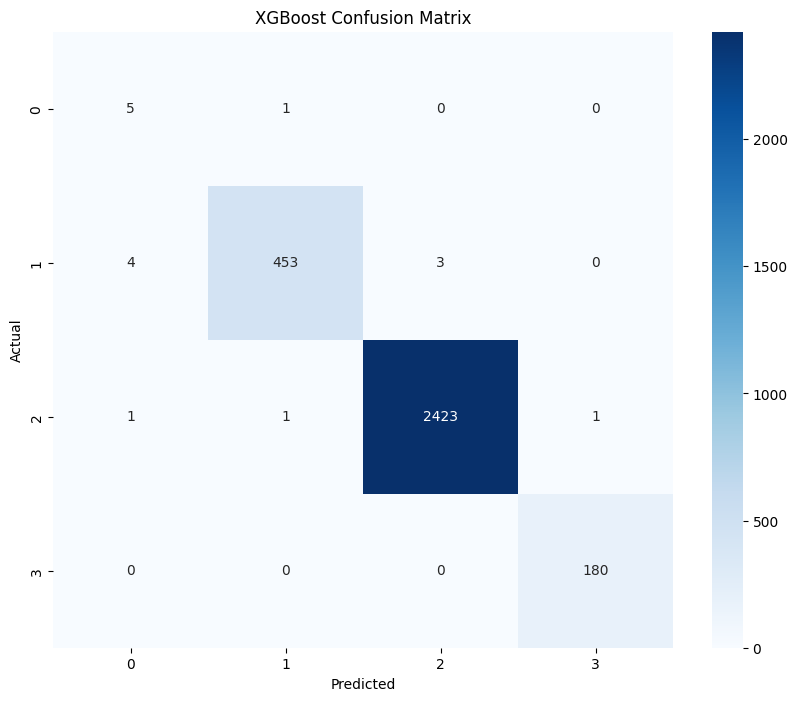

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.83      0.62         6
           1       1.00      0.98      0.99       460
           2       1.00      1.00      1.00      2426
           3       0.99      1.00      1.00       180

    accuracy                           1.00      3072
   macro avg       0.87      0.95      0.90      3072
weighted avg       1.00      1.00      1.00      3072



In [40]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict the target values for the filtered test set
y_pred_xgb = xgb_model.predict(X_test_filtered)

# Generate confusion matrix
conf_matrix_xgb = confusion_matrix(y_test_filtered, y_pred_xgb)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix_xgb)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_xgb, annot=True, cmap='Blues', fmt='g')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test_filtered, y_pred_xgb))


In [43]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Initialize individual classifiers
xgb_classifier = XGBClassifier()
catboost_classifier = CatBoostClassifier(verbose=0)

# Create the ensemble model
ensemble_model = VotingClassifier(estimators=[
    ('xgb', xgb_classifier),
    ('catboost', catboost_classifier)
], voting='soft')  # 'soft' voting combines probabilities

# Fit the ensemble model
ensemble_model.fit(X_train, y_train)

# Evaluate the ensemble model
ensemble_train_accuracy = ensemble_model.score(X_train, y_train)
ensemble_test_accuracy = ensemble_model.score(X_test_filtered, y_test_filtered)

print("Ensemble Training Accuracy:", ensemble_train_accuracy)
print("Ensemble Testing Accuracy:", ensemble_test_accuracy)


Ensemble Training Accuracy: 1.0
Ensemble Testing Accuracy: 0.9967447916666666


In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Initialize individual classifiers
xgb_classifier = XGBClassifier()
catboost_classifier = CatBoostClassifier(verbose=0)

# Create the ensemble model
ensemble_model = VotingClassifier(estimators=[
    ('xgb', xgb_classifier),
    ('catboost', catboost_classifier)
], voting='soft')  # 'soft' voting combines probabilities

# Perform cross-validation
cv_scores = cross_val_score(ensemble_model, X_train, y_train, cv=5)

print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation training Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.99755998 0.9987795  0.99674532 0.99918633 0.99796583]
Mean Cross-Validation training Accuracy: 0.9980473913764254


In [45]:
from sklearn.metrics import classification_report, confusion_matrix

# Fit the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

# Make predictions using the ensemble model on the test data
y_pred = ensemble_model.predict(X_test_filtered)

# Generate a classification report
report = classification_report(y_test_filtered, y_pred)
print("Classification Report:")
print(report)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test_filtered, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.83      0.67         6
           1       1.00      0.99      0.99       460
           2       1.00      1.00      1.00      2426
           3       0.99      1.00      1.00       180

    accuracy                           1.00      3072
   macro avg       0.89      0.95      0.91      3072
weighted avg       1.00      1.00      1.00      3072


Confusion Matrix:
[[   5    1    0    0]
 [   3  454    3    0]
 [   1    1 2423    1]
 [   0    0    0  180]]


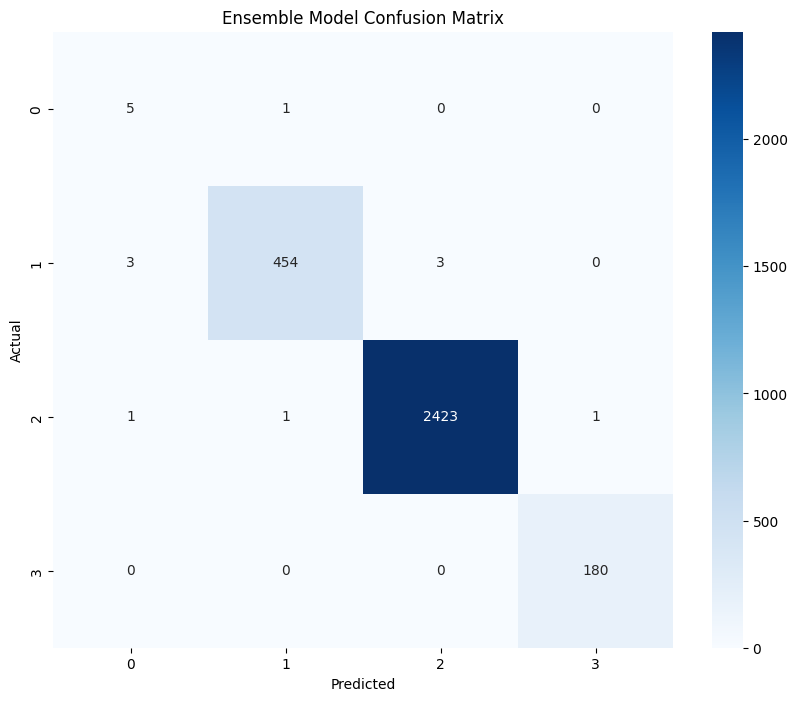

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Ensemble Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


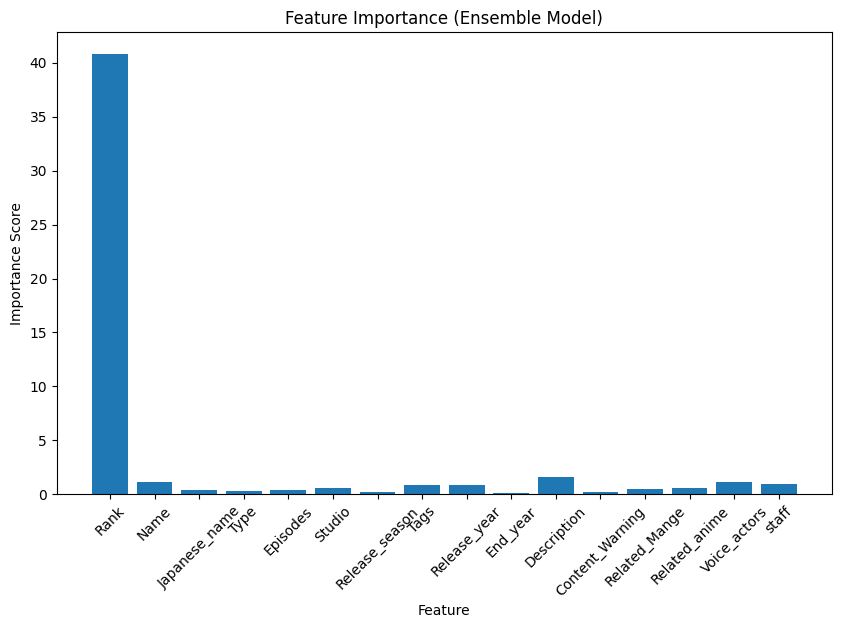

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier

# Convert DataFrame to NumPy array
X_train_np = X_train.values
y_train_np = y_train.values

# Initialize individual classifiers
xgb_classifier = XGBClassifier()
catboost_classifier = CatBoostClassifier(verbose=0)

# Create the ensemble model
ensemble_model = VotingClassifier(estimators=[
    ('xgb', xgb_classifier),
    ('catboost', catboost_classifier)
], voting='soft')  # 'soft' voting combines probabilities

# Perform k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
feature_importance_scores = []

for train_index, val_index in kf.split(X_train_np):
    X_train_fold, X_val_fold = X_train_np[train_index], X_train_np[val_index]
    y_train_fold, y_val_fold = y_train_np[train_index], y_train_np[val_index]

    ensemble_model.fit(X_train_fold, y_train_fold)

    # Extract feature importance scores from each base model
    xgb_feature_importance = ensemble_model.named_estimators_['xgb'].feature_importances_
    catboost_feature_importance = ensemble_model.named_estimators_['catboost'].feature_importances_

    # Combine feature importance scores from both base models
    combined_feature_importance = (xgb_feature_importance + catboost_feature_importance) / 2

    feature_importance_scores.append(combined_feature_importance)

# Aggregate feature importance scores across all folds
avg_feature_importance = np.mean(feature_importance_scores, axis=0)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(avg_feature_importance)), avg_feature_importance, tick_label=X_train.columns)  # Replace X_train.columns with your feature names
plt.title("Feature Importance (Ensemble Model)")
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.xticks(rotation=45)
plt.show()


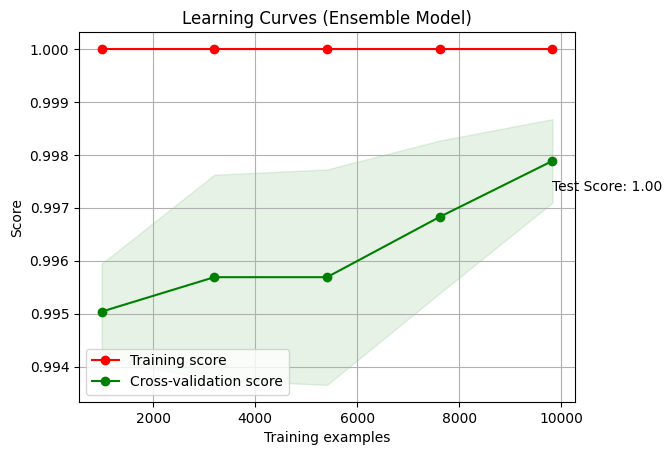

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define a function to plot learning curve
def plot_learning_curve(estimator, title, X_train, y_train, X_test, y_test, cv=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(estimator, X_train, y_train, cv=cv, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")

    # Evaluate the model on the filtered test set
    test_score = estimator.score(X_test, y_test)
    plt.text(train_sizes[-1], test_score, f'Test Score: {test_score:.2f}', verticalalignment='center')

    return plt

# Plot learning curve
title = "Learning Curves (Ensemble Model)"
plot_learning_curve(ensemble_model, title, X_train, y_train, X_test_filtered, y_test_filtered, cv=5)
plt.show()


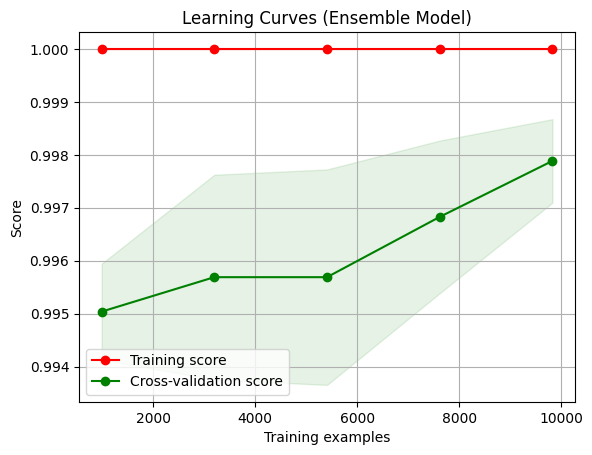

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define a function to plot learning curve
def plot_learning_curve(estimator, title, X, y, cv=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve
title = "Learning Curves (Ensemble Model)"
plot_learning_curve(ensemble_model, title, X_train, y_train, cv=5)
plt.show()


<Figure size 1000x600 with 0 Axes>

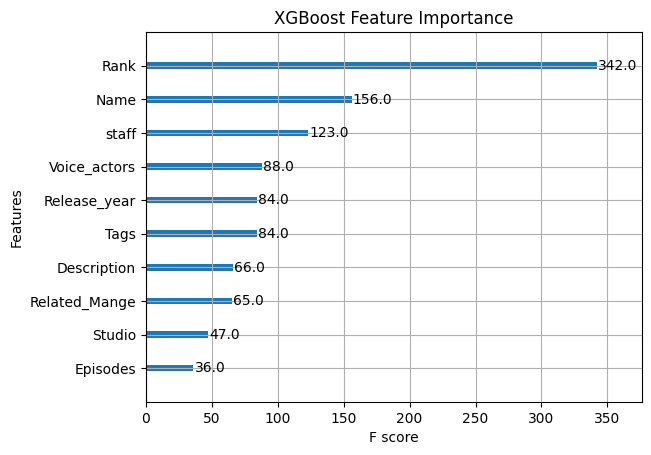

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

# Train XGBoost model (replace with your data and parameters)
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Plot feature importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_model, max_num_features=10)  # Adjust max_num_features as needed
plt.title("XGBoost Feature Importance")
plt.show()


In [ ]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Initialize individual classifiers
xgb_classifier = XGBClassifier()
catboost_classifier = CatBoostClassifier(verbose=0)

# Create the ensemble model
ensemble_model = VotingClassifier(estimators=[
    ('xgb', xgb_classifier),
    ('catboost', catboost_classifier)
], voting='soft')  # 'soft' voting combines probabilities

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Extract feature importance from each base model
xgb_feature_importance = ensemble_model.named_estimators_['xgb'].feature_importances_
catboost_feature_importance = ensemble_model.named_estimators_['catboost'].feature_importances_

# Combine feature importance scores
overall_feature_importance = (xgb_feature_importance + catboost_feature_importance) / 2  # Take the mean

# Plot overall feature importance

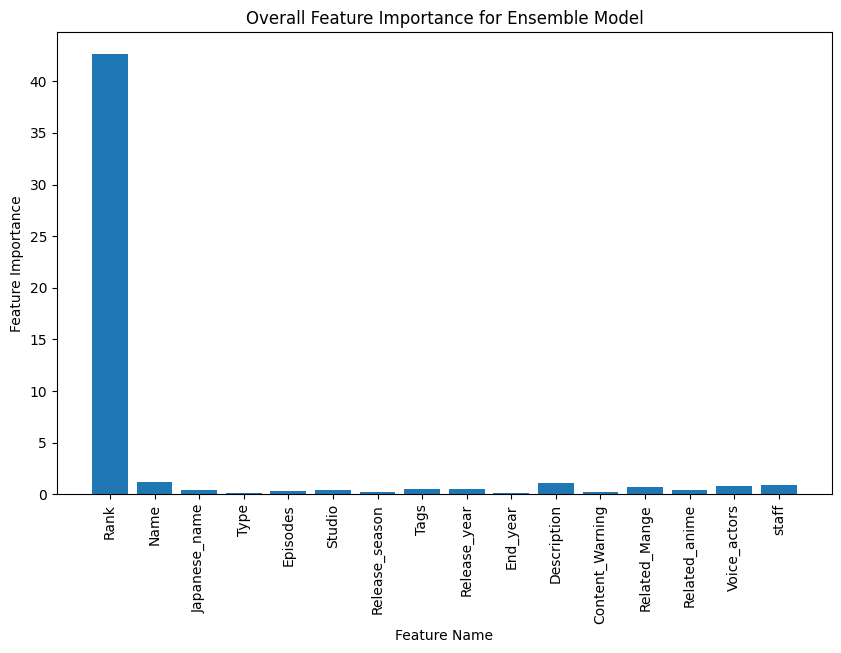

In [56]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(overall_feature_importance)), overall_feature_importance, tick_label=X_train.columns)
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.title('Overall Feature Importance for Ensemble Model')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()


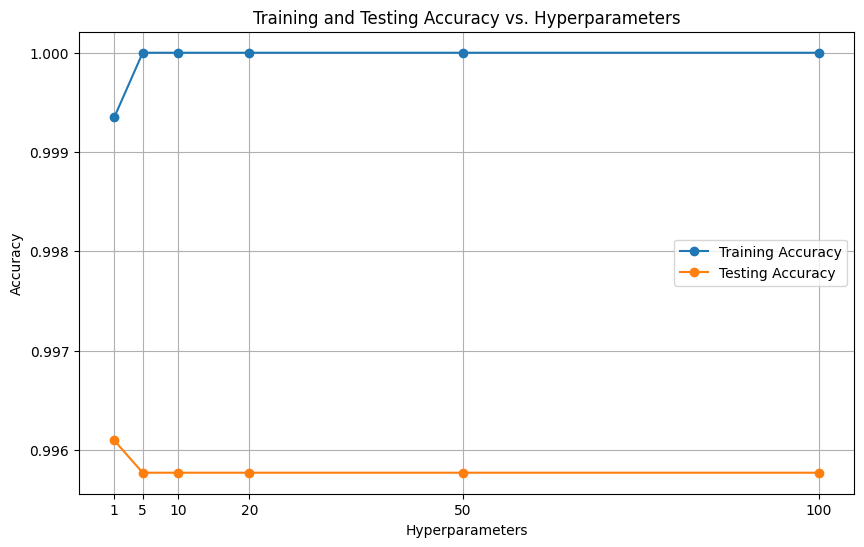

In [ ]:
import matplotlib.pyplot as plt

# List to store training and testing accuracy
train_accuracy = []
test_accuracy = []

# Hyperparameters to test
hyperparameters = [1, 5, 10, 20, 50, 100]  # Example: max_depth

# Train XGBoost models with different hyperparameters
for param in hyperparameters:
    # Initialize XGBoost model with the current hyperparameter
    xgb_model = XGBClassifier(max_depth=param)

    # Train the model
    xgb_model.fit(X_train, y_train)

    # Calculate training accuracy
    train_accuracy.append(accuracy_score(y_train, xgb_model.predict(X_train)))

    # Calculate testing accuracy
    test_accuracy.append(accuracy_score(y_test, xgb_model.predict(X_test)))

# Plot the training and testing accuracy graph
plt.figure(figsize=(10, 6))
plt.plot(hyperparameters, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(hyperparameters, test_accuracy, label='Testing Accuracy', marker='o')
plt.title('Training and Testing Accuracy vs. Hyperparameters')
plt.xlabel('Hyperparameters')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.xticks(hyperparameters)
plt.show()


for ensemble confusion matrix

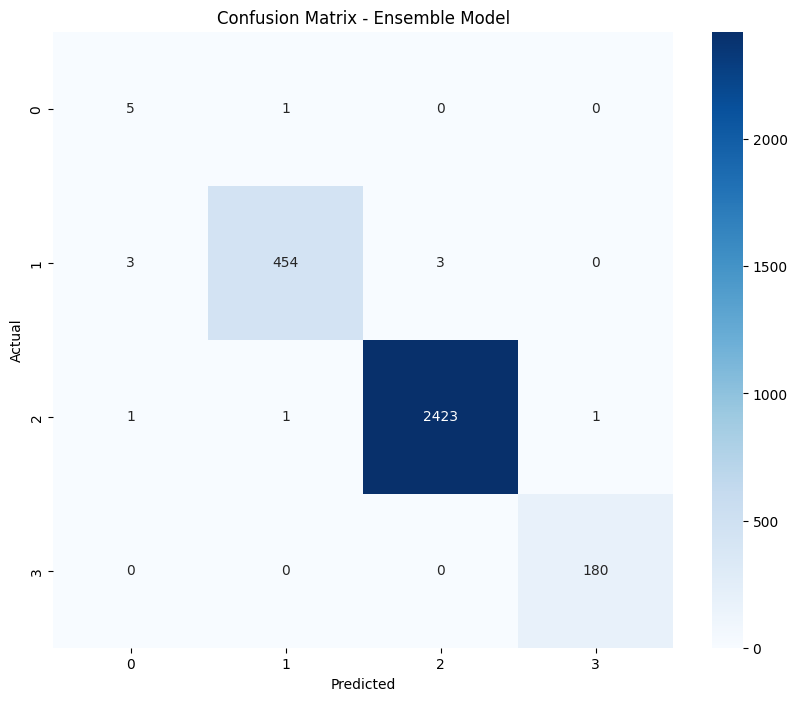

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the target values for the test set using the ensemble model
y_pred_ensemble = ensemble_model.predict(X_test_filtered)

# Generate confusion matrix for the ensemble model
conf_matrix_ensemble = confusion_matrix(y_test_filtered, y_pred_ensemble)

# Plot confusion matrix for the ensemble model
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_ensemble, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Ensemble Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


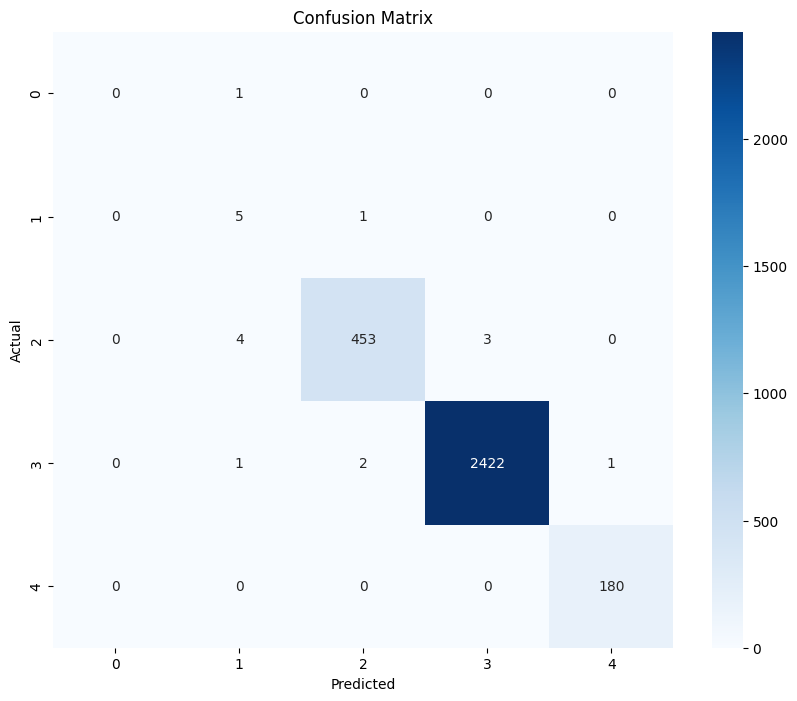

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the target values for the test set
y_pred = xgb_model.predict(X_test_filtered)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_filtered, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


xgboost

In [61]:
from sklearn.metrics import precision_score, f1_score

# from sklearn.metrics import precision_score

# Calculate precision for each class separately
precision_per_class = precision_score(y_test_filtered, y_pred_ensemble, average=None)

print("Precision per class:", precision_per_class)

f1 = f1_score(y_test_filtered, y_pred_ensemble,average=None)

# print("Precision:", precision)
print("F1 Score:", f1)


Precision per class: [0.55555556 0.99561404 0.9987634  0.99447514]

F1 Score: [0.66666667 0.99126638 0.9987634  0.99722992]


In [62]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test_filtered, y_pred_ensemble)

# Print the classification report
print("Classification Report:")
print(report)


Classification Report:

              precision    recall  f1-score   support



           0       0.56      0.83      0.67         6

           1       1.00      0.99      0.99       460

           2       1.00      1.00      1.00      2426

           3       0.99      1.00      1.00       180



    accuracy                           1.00      3072

   macro avg       0.89      0.95      0.91      3072

weighted avg       1.00      1.00      1.00      3072




LGBM

In [26]:
from lightgbm import LGBMClassifier

# Train LightGBM model
lgb_model = LGBMClassifier()
lgb_model.fit(X_train, y_train)

# Evaluate the model
lgb_accuracy = accuracy_score(y_test_filtered, lgb_model.predict(X_test_filtered))
print("LightGBM Accuracy:", lgb_accuracy)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002838 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2905
[LightGBM] [Info] Number of data points in the train set: 12291, number of used features: 16
[LightGBM] [Info] Start training from score -5.703050
[LightGBM] [Info] Start training from score -1.869648
[LightGBM] [Info] Start training from score -0.243465
[LightGBM] [Info] Start training from score -2.837371
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

In [ ]:
import warnings
import matplotlib.pyplot as plt

# Suppress LightGBM warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*No further splits with positive gain.*")

# List to store training and testing accuracy
train_accuracy = []
test_accuracy = []

# Hyperparameters to test
hyperparameters = [1, 5, 10, 20, 50, 100]  # Example: max_depth

# Train LightGBM models with different hyperparameters
for param in hyperparameters:
    # Initialize LightGBM model with the current hyperparameter
    lgb_model = LGBMClassifier()
    lgb_model.fit(X_train, y_train)

    # Calculate training accuracy
    train_accuracy.append(accuracy_score(y_train, lgb_model.predict(X_train)))

    # Calculate testing accuracy
    test_accuracy.append(accuracy_score(y_test, lgb_model.predict(X_test)))

# Plot the training and testing accuracy graph
plt.figure(figsize=(10, 6))
plt.plot(hyperparameters, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(hyperparameters, test_accuracy, label='Testing Accuracy', marker='o')
plt.title('Training and Testing Accuracy vs. Hyperparameters')
plt.xlabel('Hyperparameters')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.xticks(hyperparameters)
plt.show()


In [29]:
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test_filtered, y_pred)

# Print classification report
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         6
           1       0.99      0.99      0.99       460
           2       1.00      1.00      1.00      2426
           3       0.98      0.99      0.98       180

    accuracy                           1.00      3072
   macro avg       0.87      0.87      0.87      3072
weighted avg       1.00      1.00      1.00      3072



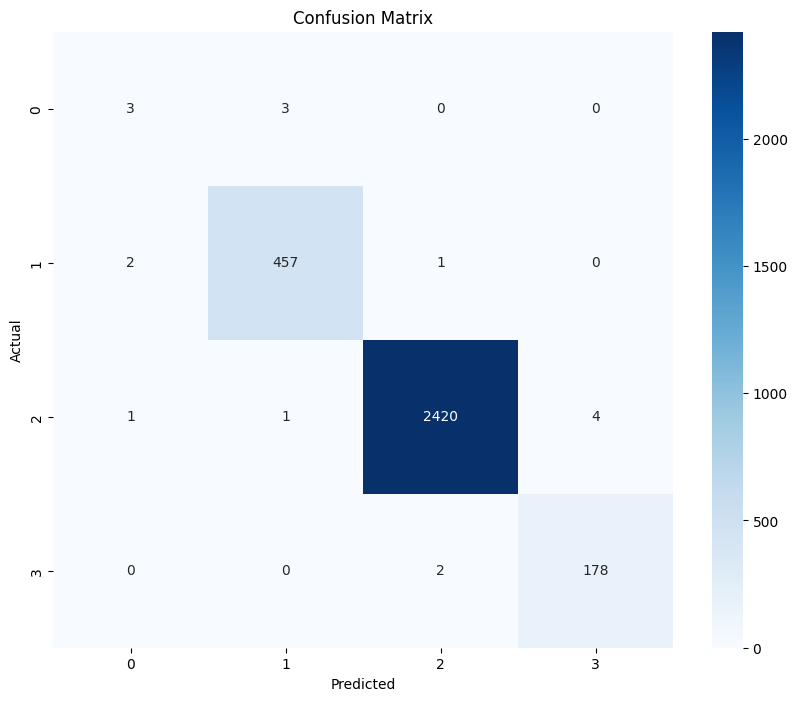

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the target values for the test set
y_pred = lgb_model.predict(X_test_filtered)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_filtered, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
from sklearn.ensemble import VotingClassifier
from lightgbm import LGBMClassifier

# Instantiate the LightGBM classifier with adjusted parameters
lgb_model = LGBMClassifier(min_child_samples=20, min_split_gain=0.0, min_child_weight=0.001)

# Train the LightGBM model
lgb_model.fit(X_train, y_train)

# Create a voting classifier ensemble
ensemble_model = VotingClassifier(estimators=[
    ('XGB', xgb_model),
    ('LGB', lgb_model)
], voting='hard')  # 'hard' for majority vote

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_test_filtered, ensemble_model.predict(X_test_filtered))
print("Ensemble Accuracy:", ensemble_accuracy)


In [49]:
print("Ensemble Accuracy:", ensemble_accuracy)


Ensemble Accuracy: 0.9967447916666666


# **light bgm cross validation**

In [ ]:
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier

# Instantiate the LightGBM classifier with adjusted parameters
lgb_model = LGBMClassifier(min_child_samples=20, min_split_gain=0.0, min_child_weight=0.001)

# Perform cross-validation
cv_scores = cross_val_score(lgb_model, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation of Accuracy:", cv_scores.std())


In [51]:
print("Cross-Validation Scores:", cv_scores)

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation of Accuracy:", cv_scores.std())

Cross-Validation Scores: [0.99552664 0.9987795  0.99593165 0.99593165 0.99715216]
Mean Accuracy: 0.996664318418483
Standard Deviation of Accuracy: 0.001189947912857477


In [ ]:
from catboost import CatBoostClassifier

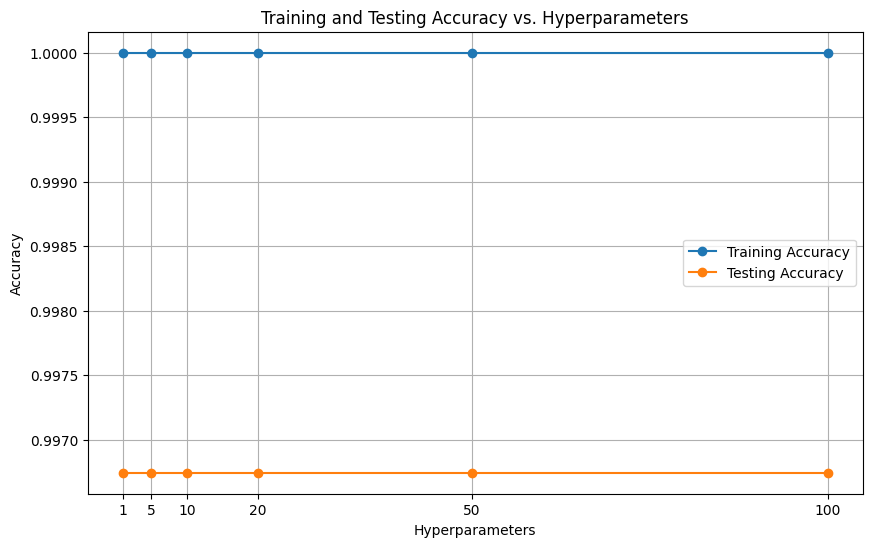

In [ ]:
import matplotlib.pyplot as plt

# List to store training and testing accuracy
train_accuracy = []
test_accuracy = []

# Hyperparameters to test
hyperparameters = [1, 5, 10, 20, 50, 100]  # Example: max_depth

# Train XGBoost models with different hyperparameters
for param in hyperparameters:
    # Calculate training accuracy
    train_accuracy.append(accuracy_score(y_train, catboost_model.predict(X_train)))

    # Calculate testing accuracy
    test_accuracy.append(accuracy_score(y_test, catboost_model.predict(X_test)))

# Plot the training and testing accuracy graph
plt.figure(figsize=(10, 6))
plt.plot(hyperparameters, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(hyperparameters, test_accuracy, label='Testing Accuracy', marker='o')
plt.title('Training and Testing Accuracy vs. Hyperparameters')
plt.xlabel('Hyperparameters')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.xticks(hyperparameters)
plt.show()


ada,xgboost,catboost ensemble

In [45]:
from sklearn.ensemble import VotingClassifier

# Initialize base models
catboost_model = CatBoostClassifier(verbose=0)
xgb_model = XGBClassifier()
adaboost_model = AdaBoostClassifier()

# Create a voting classifier
voting_classifier = VotingClassifier(
    estimators=[('catboost', catboost_model), ('xgb', xgb_model), ('adaboost', adaboost_model)],
    voting='soft'  # 'hard' voting: predicted class labels are used for majority voting
)

# Train the voting classifier
voting_classifier.fit(X_train_imputed, y_train)

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_test_filtered, voting_classifier.predict(X_test_imputed))
print("Ensemble Accuracy:", ensemble_accuracy)


Ensemble Accuracy: 0.9973958333333334


Confusion Matrix:
[[   6    0    0    0]
 [   3  454    3    0]
 [   1    1 2424    0]
 [   0    0    0  180]]


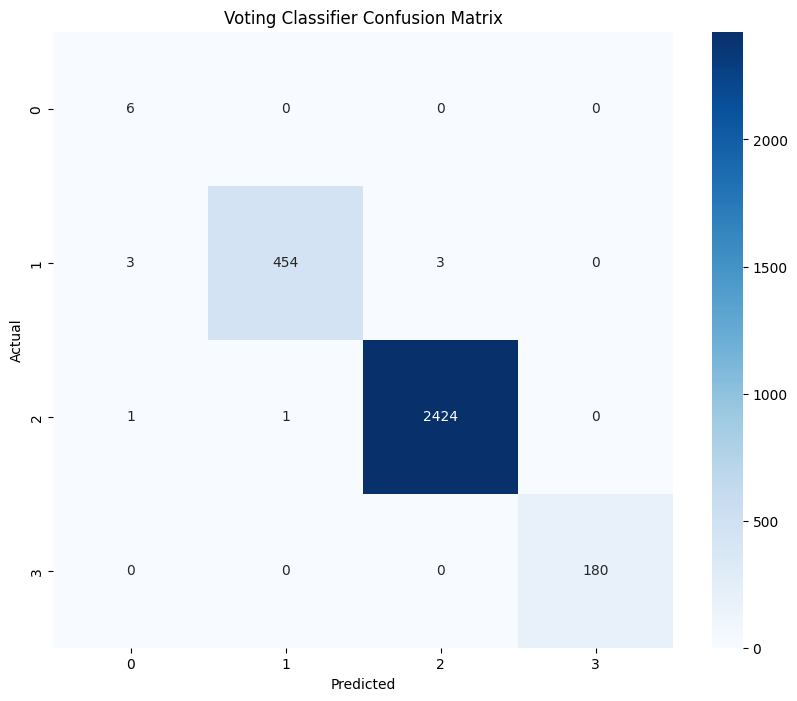

Classification Report:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75         6
           1       1.00      0.99      0.99       460
           2       1.00      1.00      1.00      2426
           3       1.00      1.00      1.00       180

    accuracy                           1.00      3072
   macro avg       0.90      1.00      0.94      3072
weighted avg       1.00      1.00      1.00      3072



In [46]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predict the target values for the filtered test set
y_pred_voting = voting_classifier.predict(X_test_imputed)

# Generate confusion matrix
conf_matrix_voting = confusion_matrix(y_test_filtered, y_pred_voting)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix_voting)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_voting, annot=True, cmap='Blues', fmt='g')
plt.title('Voting Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test_filtered, y_pred_voting))


In [42]:
# Create a copy of X_test_imputed
X_test_imputed_copy = X_test_imputed.copy()

# Replace infinite values with the maximum finite value
max_finite_value = np.nanmax(X_test_imputed_copy[np.isfinite(X_test_imputed_copy)])
X_test_imputed_copy[~np.isfinite(X_test_imputed_copy)] = max_finite_value

# Verify if there are any remaining infinite values
inf_count = np.isfinite(X_test_imputed_copy).sum()
print("Number of infinite values after replacement:", inf_count)


Number of infinite values after replacement: 49152


In [43]:
# Find the maximum finite value in the array
max_finite_value = np.nanmax(np.abs(X_test_imputed[np.isfinite(X_test_imputed)]))

# Replace infinite values with a large finite value
X_test_imputed[~np.isfinite(X_test_imputed)] = np.sign(X_test_imputed[~np.isfinite(X_test_imputed)]) * max_finite_value

# Verify if there are any remaining infinite values
inf_count = np.isfinite(X_test_imputed).sum()
print("Number of infinite values after replacement:", inf_count)


ValueError: assignment destination is read-only

In [37]:
print("Shape of X_test_imputed:", X_test_imputed.shape)


Shape of X_test_imputed: (3072, 16)


In [38]:
import numpy as np

# Check for NaNs
nan_count = np.isnan(X_test_imputed).sum()
print("Number of NaNs in X_test_imputed:", nan_count)

# Check for infinite values
inf_count = np.isfinite(X_test_imputed).sum()
print("Number of infinite values in X_test_imputed:", inf_count)


Number of NaNs in X_test_imputed: 0
Number of infinite values in X_test_imputed: 49152


In [40]:
print("Data types of features in X_test_imputed:", X_test_imputed.dtype)


Data types of features in X_test_imputed: float64


catboost confusion matrix

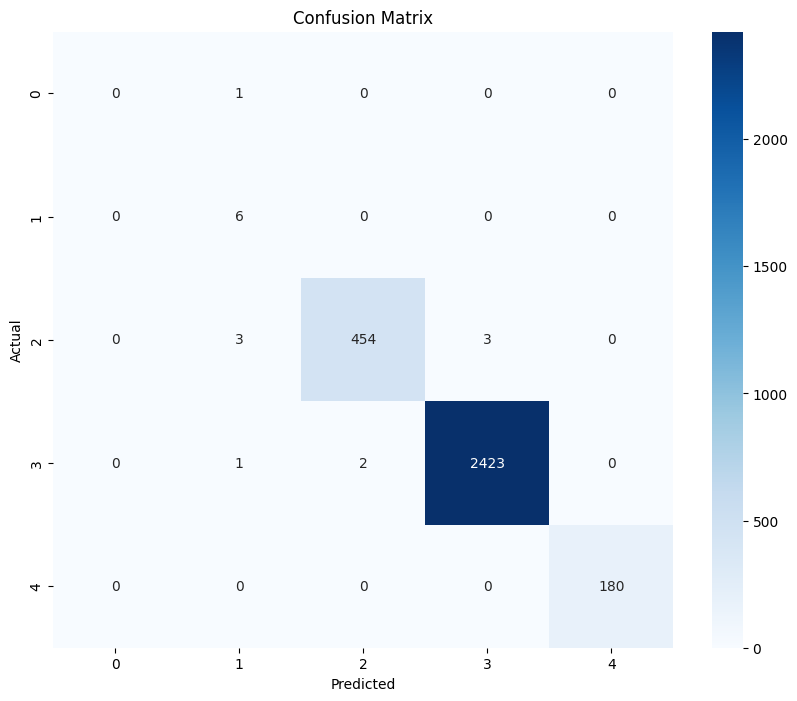

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the target values for the test set
y_pred = catboost_model.predict(X_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


GBT CLASSIFER

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

In [53]:
from sklearn.impute import SimpleImputer

# Impute missing values
imputer = SimpleImputer(strategy='mean')  # You can choose other strategies as well
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test_filtered)

# Train Gradient Boosting model
gbdt_model = GradientBoostingClassifier()
gbdt_model.fit(X_train_imputed, y_train)

# Evaluate the model
gbdt_accuracy = accuracy_score(y_test_filtered, gbdt_model.predict(X_test_imputed))
print("Gradient Boosting Decision Trees Accuracy:", gbdt_accuracy)


Gradient Boosting Decision Trees Accuracy: 0.9993489583333334


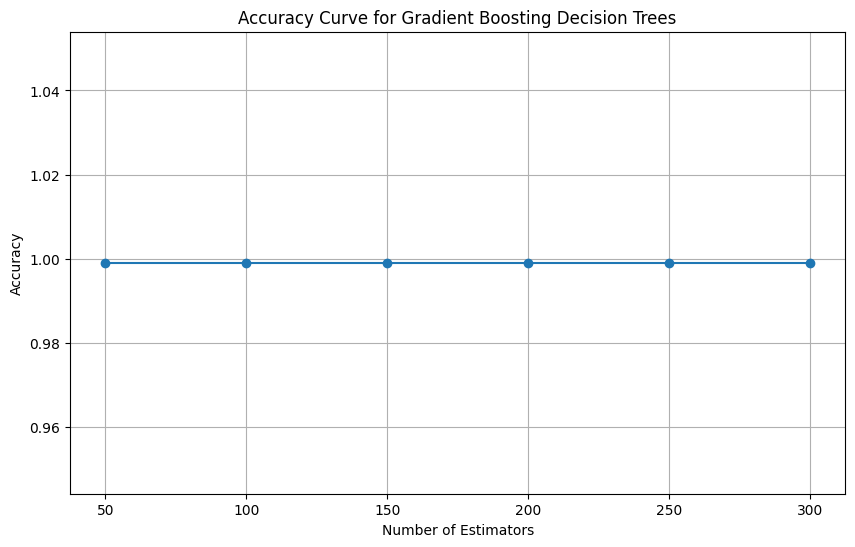

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

# Define a range of hyperparameter values to test
estimators_range = [50, 100, 150, 200, 250, 300]  # Example range for number of estimators

# Initialize lists to store accuracy scores
accuracy_scores = []

# Iterate over hyperparameter values
for estimators in estimators_range:
    # Train Gradient Boosting model with current hyperparameter value
    gbdt_model = GradientBoostingClassifier(n_estimators=estimators)
    gbdt_model.fit(X_train_imputed, y_train)

    # Evaluate the model
    accuracy = accuracy_score(y_test, gbdt_model.predict(X_test_imputed))
    accuracy_scores.append(accuracy)

# Plot accuracy curve
plt.figure(figsize=(10, 6))
plt.plot(estimators_range, accuracy_scores, marker='o', linestyle='-')
plt.title('Accuracy Curve for Gradient Boosting Decision Trees')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.xticks(estimators_range)
plt.grid(True)
plt.show()


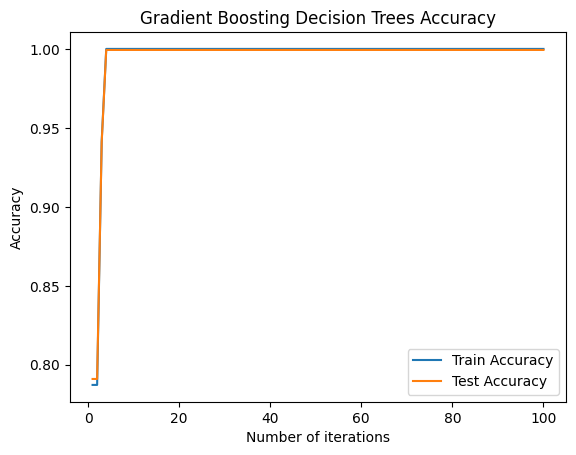

In [65]:
train_accuracies = []
test_accuracies = []
for i, y_pred_train in enumerate(gbdt_model.staged_predict(X_train_imputed)):
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_accuracies.append(train_accuracy)

    y_pred_test = gbdt_model.staged_predict(X_test_imputed)
    test_accuracy = accuracy_score(y_test_filtered, list(y_pred_test)[i])
    test_accuracies.append(test_accuracy)

# Plot train and test accuracies
iterations = np.arange(1, len(train_accuracies) + 1)
plt.plot(iterations, train_accuracies, label='Train Accuracy')
plt.plot(iterations, test_accuracies, label='Test Accuracy')
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.title('Gradient Boosting Decision Trees Accuracy')
plt.legend()
plt.show()

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       1.00      1.00      1.00       460
           2       1.00      1.00      1.00      2426
           3       1.00      1.00      1.00       180

    accuracy                           1.00      3072
   macro avg       0.96      0.96      0.96      3072
weighted avg       1.00      1.00      1.00      3072



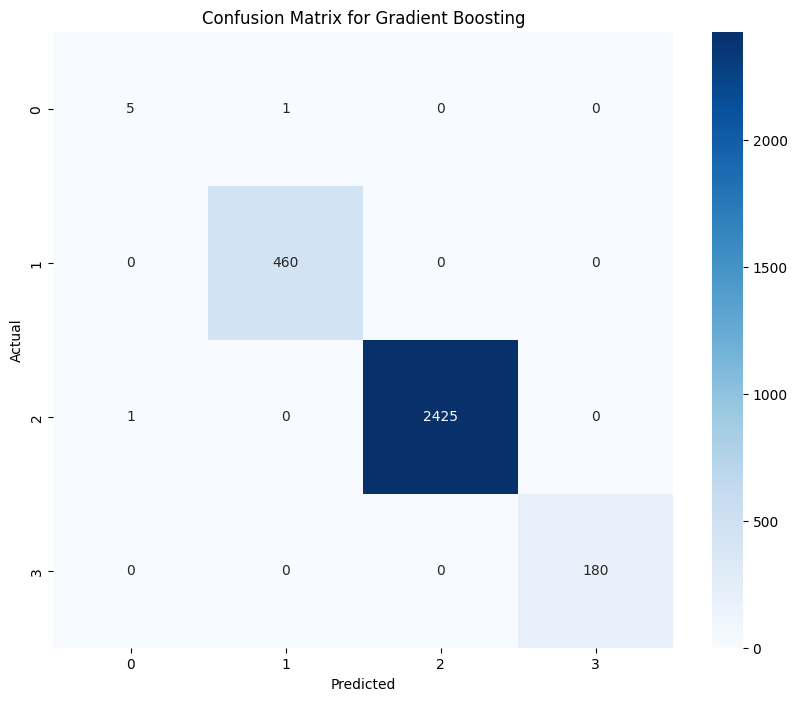

In [55]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Generate predictions for the test set
y_pred_gbdt = gbdt_model.predict(X_test_imputed)

# Generate classification report
report_gbdt = classification_report(y_test_filtered, y_pred_gbdt)
print("Classification Report for Gradient Boosting:")
print(report_gbdt)

# Generate confusion matrix
conf_matrix_gbdt = confusion_matrix(y_test_filtered, y_pred_gbdt)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_gbdt, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



ada boost 

In [33]:
from sklearn.ensemble import AdaBoostClassifier


In [34]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')  # You can choose other strategies as well
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test_filtered)

# Train AdaBoost model
adaboost_model = AdaBoostClassifier()
adaboost_model.fit(X_train_imputed, y_train)

# Evaluate the model
adaboost_accuracy = accuracy_score(y_test_filtered, adaboost_model.predict(X_test_imputed))
print("AdaBoost Accuracy:", adaboost_accuracy)

AdaBoost Accuracy: 0.9993489583333334


Classification Report for AdaBoost:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       1.00      1.00      1.00       460
           2       1.00      1.00      1.00      2426
           3       1.00      1.00      1.00       180

    accuracy                           1.00      3072
   macro avg       0.96      0.96      0.96      3072
weighted avg       1.00      1.00      1.00      3072



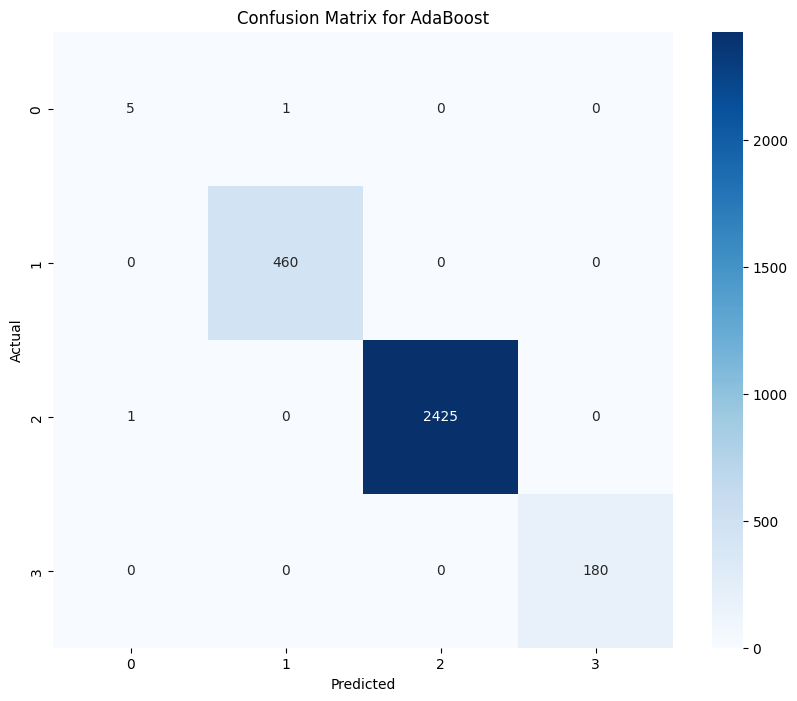

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Generate predictions for the test set
y_pred_adaboost = adaboost_model.predict(X_test_imputed)

# Generate classification report
report_adaboost = classification_report(y_test_filtered, y_pred_adaboost)
print("Classification Report for AdaBoost:")
print(report_adaboost)

# Generate confusion matrix
conf_matrix_adaboost = confusion_matrix(y_test_filtered, y_pred_adaboost)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_adaboost, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for AdaBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


catboost and adaboost

In [62]:
from sklearn.ensemble import VotingClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Create CatBoost classifier
catboost_classifier = CatBoostClassifier(verbose=0)

# Create the ensemble model with CatBoost and AdaBoost classifiers
ensemble_model = VotingClassifier(estimators=[
    ('catboost', catboost_classifier),
    ('adaboost', adaboost_model)
], voting='soft')  # Use 'hard' voting to predict the class with the most votes

# Train the ensemble model on the imputed training data
ensemble_model.fit(X_train_imputed, y_train)

# Generate predictions for the test set
y_pred_ensemble = ensemble_model.predict(X_test_imputed)

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_test_filtered, y_pred_ensemble)
print("Ensemble Model Accuracy:", ensemble_accuracy)


Ensemble Model Accuracy: 0.9977213541666666


gdbt and adaboost

In [65]:
from sklearn.ensemble import VotingClassifier

# Create the ensemble model with the GBDT and AdaBoost models
ensemble_model_2 = VotingClassifier(estimators=[
    ('gbdt', gbdt_model),
    ('adaboost', adaboost_model)
], voting='hard')  # Use 'hard' voting to predict the class with the most votes

# Train the ensemble model on the imputed training data
ensemble_model_2.fit(X_train_imputed, y_train)

# Evaluate the ensemble model
ensemble_accuracy = accuracy_score(y_test_filtered, ensemble_model.predict(X_test_imputed))
print("Ensemble Model Accuracy:", ensemble_accuracy)


Ensemble Model Accuracy: 0.9993489583333334


Ensemble Model Accuracy: 0.9993489583333334
Classification Report for Ensemble Model 2:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       1.00      1.00      1.00       460
           2       1.00      1.00      1.00      2426
           3       1.00      1.00      1.00       180

    accuracy                           1.00      3072
   macro avg       0.96      0.96      0.96      3072
weighted avg       1.00      1.00      1.00      3072



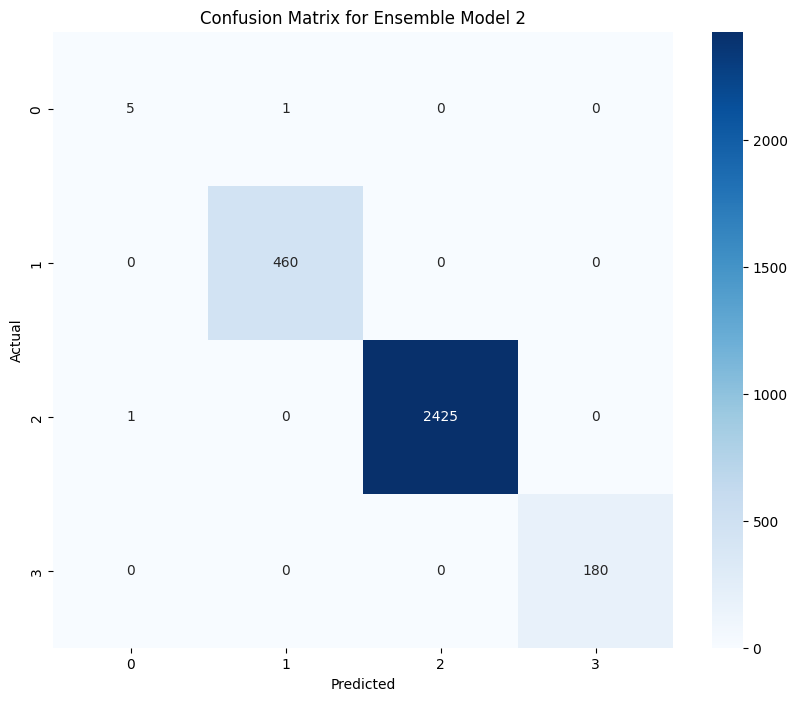

In [68]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Generate predictions for the test set using ensemble_model_2
y_pred_ensemble_2 = ensemble_model_2.predict(X_test_imputed)

# Evaluate the ensemble_model_2
ensemble_accuracy_2 = accuracy_score(y_test_filtered, y_pred_ensemble_2)
print("Ensemble Model Accuracy:", ensemble_accuracy_2)

# Generate classification report
report_ensemble_2 = classification_report(y_test_filtered, y_pred_ensemble_2)
print("Classification Report for Ensemble Model 2:")
print(report_ensemble_2)

# Generate confusion matrix
conf_matrix_ensemble_2 = confusion_matrix(y_test_filtered, y_pred_ensemble_2)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_ensemble_2, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Ensemble Model 2')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


cross validation for ensemnble_2

In [66]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(ensemble_model_2, X_train_imputed, y_train, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())


Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Accuracy: 1.0


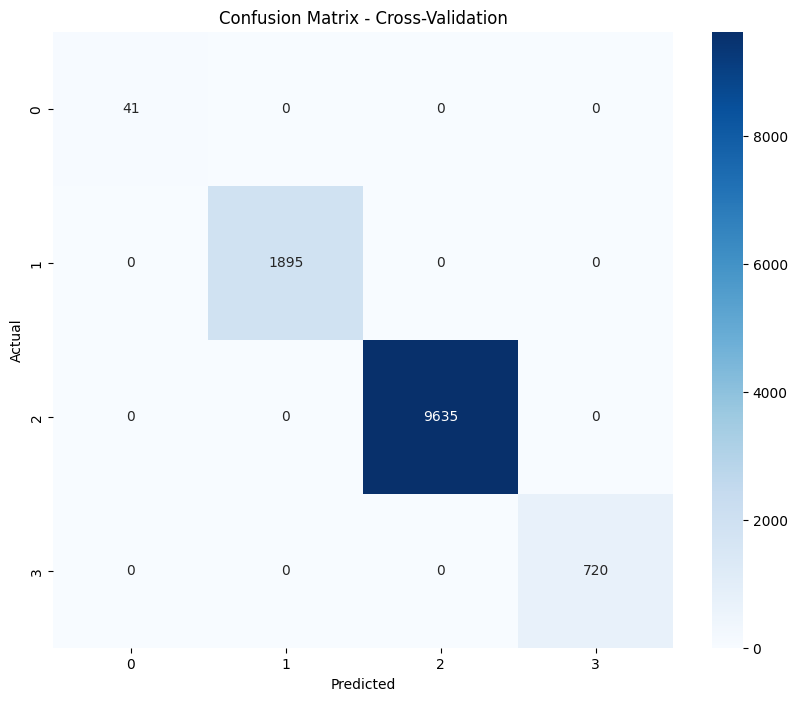

In [71]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# Perform cross-validation predictions
y_pred_cv = cross_val_predict(ensemble_model, X_train_imputed, y_train, cv=5)

# Generate confusion matrix
conf_matrix_cv = confusion_matrix(y_train, y_pred_cv)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_cv, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Cross-Validation')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [72]:
report = classification_report(y_train, y_pred_cv)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:

              precision    recall  f1-score   support



           0       1.00      1.00      1.00        41

           1       1.00      1.00      1.00      1895

           2       1.00      1.00      1.00      9635

           3       1.00      1.00      1.00       720



    accuracy                           1.00     12291

   macro avg       1.00      1.00      1.00     12291

weighted avg       1.00      1.00      1.00     12291




In [ ]:
print(X_test.isnull().sum())

Rank                  0

Name                  0

Japanese_name         0

Type                  0

Episodes           1408

Studio                0

Release_season        0

Tags                  0

Release_year          4

End_year           2547

Description           0

Content_Warning       0

Related_Mange         0

Related_anime         0

Voice_actors          0

staff                 0

dtype: int64


lgb confusion matrix


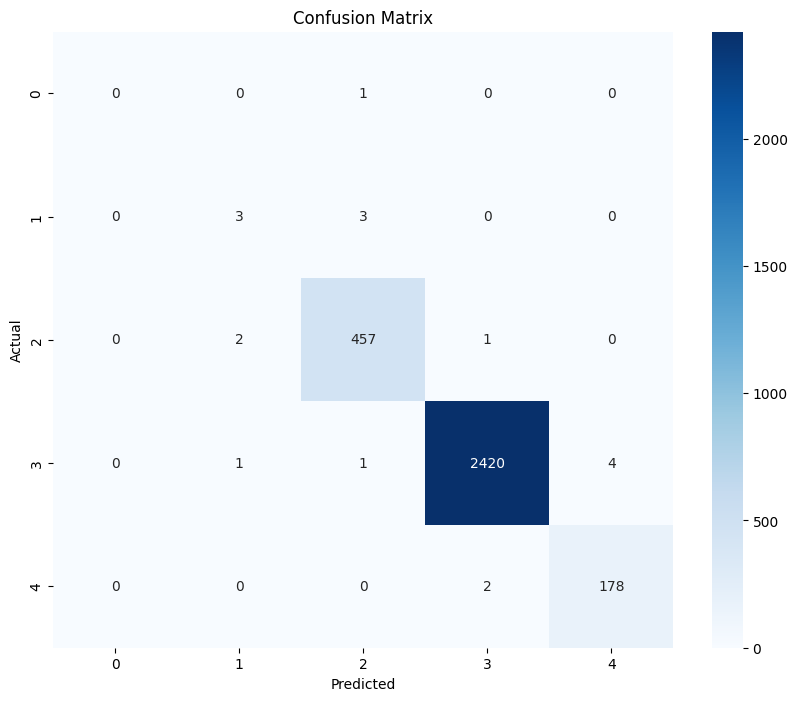

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the target values for the test set
y_pred = lgb_model.predict(X_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [69]:
# If there are missing values, impute them using a suitable method
# For example, using the mean or median
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

overal ensembeled


In [77]:
from sklearn.ensemble import AdaBoostClassifier
import numpy as np

# Step 1: Obtain Predictions from Base Models
predictions_catboost = catboost_model.predict(X_train_imputed)
predictions_adaboost = adaboost_model.predict(X_train_imputed)

# Step 2: Create a New Dataset
stacked_X_train = np.column_stack((predictions_catboost, predictions_adaboost))

# Step 3: Train a Meta-Learner
meta_learner = AdaBoostClassifier()  # You can choose any classifier as the meta-learner
meta_learner.fit(stacked_X_train, y_train)

# Step 4: Evaluate the Stacked Model
# Obtain predictions from base models on the test data
predictions_catboost_test = catboost_model.predict(X_test_imputed)
predictions_adaboost_test = adaboost_model.predict(X_test_imputed)

# Create a new dataset with predictions from both base models for the test data
stacked_X_test = np.column_stack((predictions_catboost_test, predictions_adaboost_test))

# Make predictions with the meta-learner
stacked_model_accuracy = meta_learner.score(stacked_X_test, y_test_filtered)
print("Stacked Model Accuracy:", stacked_model_accuracy)


Stacked Model Accuracy: 0.9993489583333334


In [78]:
predictions_stacked_test = meta_learner.predict(stacked_X_test)
report = classification_report(y_test_filtered, predictions_stacked_test)
print("Classification Report:")
print(report)
conf_matrix_stacked = confusion_matrix(y_test_filtered, predictions_stacked_test)
print("Confusion Matrix:")
print(conf_matrix_stacked)


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       1.00      1.00      1.00       460
           2       1.00      1.00      1.00      2426
           3       1.00      1.00      1.00       180

    accuracy                           1.00      3072
   macro avg       0.96      0.96      0.96      3072
weighted avg       1.00      1.00      1.00      3072

Confusion Matrix:
[[   5    1    0    0]
 [   0  460    0    0]
 [   1    0 2425    0]
 [   0    0    0  180]]


In [71]:
# Obtain predictions from base models on the test data
predictions_gbdt_test = gbdt_model.predict(X_test_imputed)
predictions_adaboost_test = adaboost_model.predict(X_test_imputed)

# Create a new dataset with predictions from both base models for the test data
stacked_X_test = np.column_stack((predictions_gbdt_test, predictions_adaboost_test))

# Make predictions with the meta-learner
stacked_model_accuracy = meta_learner.score(stacked_X_test, y_test_filtered)
print("Stacked Model Accuracy:", stacked_model_accuracy)


Stacked Model Accuracy: 0.9993489583333334
